# Demonstration of DLCsv

The code below is a fast method for visualising data acquired using DLC after it being imported and processed inside DLCsv.

In [1]:
%load_ext autoreload
%matplotlib inline

In [2]:
import matplotlib.pylab as plt
import numpy as np
import scipy as sc
import os

from dlca.readers import DLCsv
from dlca.analysis import DLCPos
from settings import DATA_FOLDER_NAME

## Preparation

Create folder named data in ./DeepLabCutAnalysis/:

In [3]:
if not os.path.exists(DATA_FOLDER_NAME):
    os.mkdir(DATA_FOLDER_NAME)

After creating the data folder place files that are to be used for analysing. Generaly, a .csv file and video file(s). We won't be needing video files in this demonstration of DLCsv.

In [4]:
csv_file = 'test_tracking.csv'    # Name of the .csv file in data to be used for data extraction

In [5]:
local_file = DLCsv(os.path.join(DATA_FOLDER_NAME, csv_file))

In [6]:
rw = local_file.raw_df
x_n = rw.nose.x
y_n = rw.nose.y

time = np.arange(len(x_n))

In [7]:
plt.show()

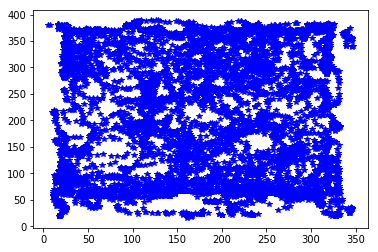

In [8]:
plt.plot(x_n, y_n, 'b*')

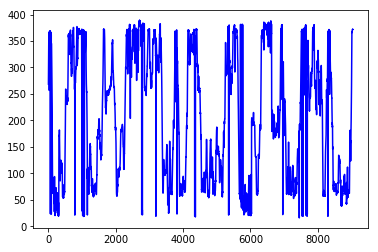

In [9]:
plt.plot(time, y_n, 'b-')

In [10]:
clean = local_file.clean(min_like=0.95, max_vel=50, save=False)
x_nc = clean.nose.x
y_nc = clean.nose.y

(array([ 293,  298,  781, 1056, 3821, 4340, 4363, 5783, 5860, 5902, 5933,
       5980, 5984, 6453, 6573, 6957, 7450], dtype=int64),)
[101.83271849 102.1559298   87.74744391  78.28563002  67.44102454
 140.32246625 108.07207656  74.45430334 123.67184448 152.57742001
 151.88821274 146.76152396 144.00368673 129.422122   115.69534415
 213.48744869 102.73137474]
(array([ 307,  784, 1056, 1157, 3821, 4352, 4364, 6029, 6031, 6959, 7450,
       8351], dtype=int64),)
[ 75.49263334 253.05466413 349.69939113  87.37629402 313.8412528
 338.65662003 313.45258284 131.75911874 160.37631464 270.31584881
 168.77300072 118.97325611]
(array([2704], dtype=int64),)
[72.66100121]
(array([2704, 6390, 8478, 8491], dtype=int64),)
[344.9580791   51.87425214 164.33591247 165.41047603]
(array([ 182,  300, 3564, 5773, 5980], dtype=int64),)
[56.41400814 78.33882225 53.11774829 53.07988262 97.11227691]
(array([ 310, 1112, 8341], dtype=int64),)
[80.76443291 70.35760021 92.86748505]
(array([289, 295, 298], dtype=int64),

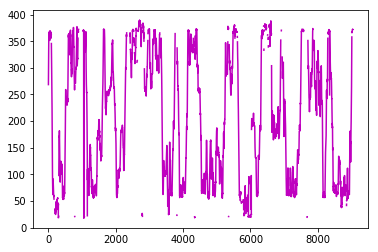

In [11]:
plt.plot(time, y_nc, 'm-')

In [12]:
int_pol = local_file.interpolate(method='linear', save=False)
x_ni = int_pol.nose.x
y_ni = int_pol.nose.y

(array([5902, 5933, 6957], dtype=int64),)
[152.57742001 151.88821274 213.48744869]
(array([ 784, 1056, 3821, 4352, 4364, 6031, 6959, 7450], dtype=int64),)
[253.05466413 349.69939113 313.8412528  338.65662003 313.45258284
 160.37631464 270.31584881 168.77300072]
(array([], dtype=int64),)
[]
(array([2704, 8478, 8491], dtype=int64),)
[344.9580791  164.33591247 165.41047603]
(array([], dtype=int64),)
[]
(array([], dtype=int64),)
[]
(array([], dtype=int64),)
[]
(array([2675], dtype=int64),)
[325.26795113]


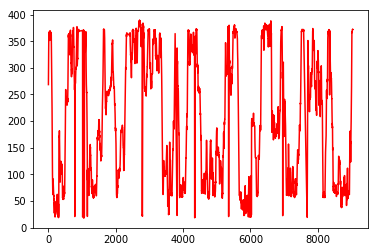

In [13]:
plt.plot(time, y_ni, 'r-')